In [6]:
import torch

In [12]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import json


In [67]:
# Load the trained model
model = load_model('color_classification_cnn_model.h5')  # Replace with the path to your h5 model file

In [76]:
# Function to preprocess an image for prediction
def preprocess_image(image_path):
    target_size=(32,32)
    img = image.load_img(image_path, target_size=(32, 32))
    print(img)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to be between 0 and 1
    return img_array
    # resized_image = cv2.resize(image_path,target_size)
    # img_array = np.expand_dims(resized_image, axis=0)
    # img_array = img_array.astype('float32') / 255.0
    return img_array

In [79]:
# Function to make predictions and display the result
def predict_and_display(image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)
    CATEGORIES = ['Black','Blue','Brown','Gray', 'Green','Orange','Pink','Purple','Red','White','Yellow']
    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class
    predicted_class = np.argmax(predictions)

    # Load and display the image
    image = cv2.imread(image_path)

# Convert from BGR to RGB (OpenCV loads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # img = image.load_img(image_path)
    plt.imshow(image_rgb)
    plt.axis('off')

    # Display the predicted class
    plt.title(f'Predicted Class: {CATEGORIES[predicted_class]}')
    plt.show()


In [64]:
with open('./testing.json', 'r') as file:
        json_data = json.load(file)

In [65]:
img_arr = np.array(json_data[0]["0003"]["body2"]["cropped_img"], dtype=np.uint8)
cropped_roi_rgb = cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR)

<PIL.Image.Image image mode=RGB size=32x32 at 0x2282F587450>
1/1 [==============================] - 0s 68ms/step


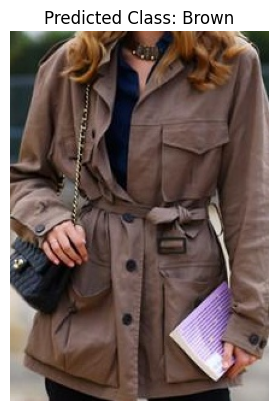

In [81]:
# Example: Replace 'path/to/your/image.jpg' with the path to your new image
new_image_path = 'cropped_body1_0.52.jpg'
predict_and_display(new_image_path)